In [1]:
pwd

'c:\\Users\\gameg\\OneDrive\\Desktop\\data'

ModuleNotFoundError: No module named 'google.colab'

In [3]:
import pandas as pd

#Using raw string
df = pd.read_csv(r'java.csv')



In [4]:
#Lambda Function to determine recommendation based on rating

#Applying the lambda function to create the recommendation column in our dataframe
df['recommendation'] = df['rating'].apply(lambda x: 1 if x >= 7 else 0)

#Printing the DataFrame with the new recommendation column
print(df)




        Unnamed: 0.1  Unnamed: 0  fit  user_id  item_id  rating  \
0                  0           0  fit   420272  2260466    10.0   
1                  1           1  fit   273551   153475    10.0   
2                  2           3  fit   909926   126335     8.0   
3                  3           4  fit   151944   616682    10.0   
4                  4           5  fit   734848   364092     8.0   
...              ...         ...  ...      ...      ...     ...   
166494        166494      192539  fit    66386  2252812    10.0   
166495        166495      192540  fit   118398   682043    10.0   
166496        166496      192541  fit    47002   683251     6.0   
166497        166497      192542  fit   961120   126335    10.0   
166498        166498      192543  fit   123612   127865    10.0   

           rented for                                        review_text  \
0            vacation  an adorable romper belt and zipper were a litt...   
1               other  i rented this dress 

In [5]:
df

,Unnamed: 0.1,Unnamed: 0,fit,user_id,item_id,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date,tokenized_review_summary,tokenized_review_text,recommendation
0,0,0,fit,420272,2260466,10.0,vacation,an adorable romper belt and zipper were a litt...,hourglass,so many compliments,romper,"5' 8""",14,28.0,"April 20, 2016","['many', 'compliments']","['adorable', 'romper', 'belt', 'zipper', 'litt...",1
1,1,1,fit,273551,153475,10.0,other,i rented this dress for a photo shoot the them...,straight & narrow,i felt so glamourous,gown,"5' 6""",12,36.0,"June 18, 2013","['felt', 'glamourous']","['rented', 'dress', 'photo', 'shoot', 'theme',...",1
2,2,3,fit,909926,126335,8.0,formal affair,i rented this for my companys black tie awards...,pear,dress arrived on time and in perfect condition,dress,"5' 5""",8,34.0,"February 12, 2014","['dress', 'arrived', 'time', 'perfect', 'condi...","['rented', 'companys', 'black', 'tie', 'awards...",1
3,3,4,fit,151944,616682,10.0,wedding,i have always been petite in my upper body and...,athletic,was in love with this dress,gown,"5' 9""",12,27.0,"September 26, 2016","['love', 'dress']","['always', 'petite', 'upper', 'body', 'extreme...",1
4,4,5,fit,734848,364092,8.0,date,didnt actually wear it it fit perfectly the fa...,athletic,traditional with a touch a sass,dress,"5' 8""",8,45.0,"April 30, 2016","['traditional', 'touch', 'sass']","['didnt', 'actually', 'wear', 'fit', 'perfectl...",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166494,166494,192539,fit,66386,2252812,10.0,work,fit like a glove,hourglass,love it first item im thinking of buying,jumpsuit,"5' 9""",8,42.0,"May 18, 2016","['love', 'first', 'item', 'im', 'thinking', 'b...","['fit', 'like', 'glove']",1
166495,166495,192540,fit,118398,682043,10.0,work,the pattern contrast on this dress is really s...,petite,love it,dress,"5' 1""",4,29.0,"September 30, 2016",['love'],"['pattern', 'contrast', 'dress', 'really', 'st...",1
166496,166496,192541,fit,47002,683251,6.0,everyday,like the other dvf wraps the fit on this is fa...,straight & narrow,loud patterning flattering fit,dress,"5' 8""",8,31.0,"March 4, 2016","['loud', 'patterning', 'flattering', 'fit']","['like', 'dvf', 'wraps', 'fit', 'fantastic', '...",0
166497,166497,192542,fit,961120,126335,10.0,wedding,this dress was perfection it looked incredibl...,pear,loved this dress it was comfortable and photog...,dress,"5' 6""",16,31.0,"November 25, 2015","['loved', 'dress', 'comfortable', 'photographe...","['dress', 'perfection', 'looked', 'incredible'...",1


In [10]:


import matplotlib.pyplot as plt
import seaborn as sns

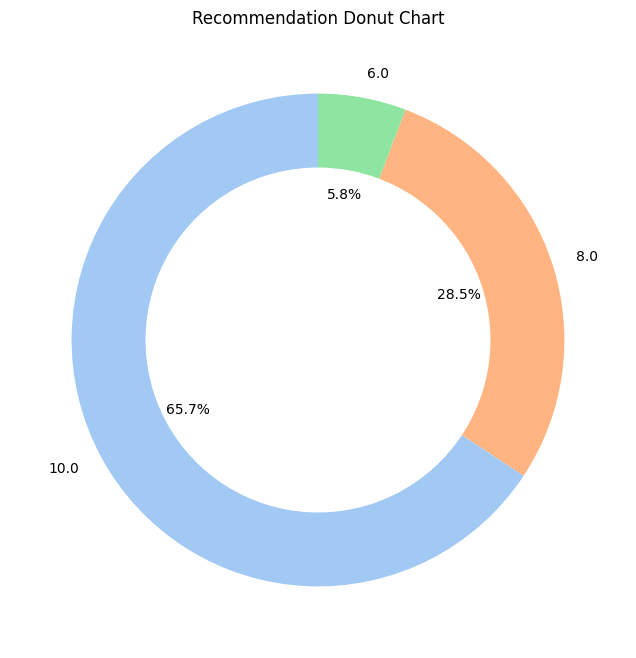

In [12]:
recommendation_counts = df['rating'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(recommendation_counts, labels=recommendation_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'), wedgeprops=dict(width=0.3))
plt.title('Recommendation Donut Chart')
plt.show()

In [6]:
import string
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

#Downloading the wordnet and stopwords resources for future implementations
nltk.download('wordnet')
nltk.download('stopwords')

#Defining the clean_text function
def clean_text(text):
    #Removing punctuation
    text = re.sub(f'[{string.punctuation}]', '', text)
    return text

#This Function is to tokenize, clean, and lemmatize text
def tokenize_clean_and_lemmatize(text):
    if isinstance(text, str):  #we are checking if the value is a string

        #Here tokenizing the text
        tokens = re.findall(r'\b\w+\b', text.lower())

        #Cleaning each token and lemmatize
        lemmatizer = WordNetLemmatizer()
        tokens_without_punc = [lemmatizer.lemmatize(clean_text(token)) for token in tokens]

        #Removing stopwords
        stop_words = set(stopwords.words('english'))
        tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]

        return tokens_without_sw
    else:
        return [] #Returning an empty list for NaN values

#Applying the tokenize_clean_and_lemmatize function to the review_text column
df['cleaned_tokens_lemmatized'] = df['review_text'].apply(tokenize_clean_and_lemmatize)

#Printing the DataFrame with the cleaned and lemmatized cleaned_tokens_lemmatized column
print(df[['review_text', 'cleaned_tokens_lemmatized']])



[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\gameg\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gameg\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


KeyboardInterrupt: 

In [ ]:
df

,Unnamed: 0.1,Unnamed: 0,fit,user_id,item_id,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date,tokenized_review_summary,tokenized_review_text,recommendation,cleaned_tokens_lemmatized
0,0,0,fit,420272,2260466,10.0,vacation,an adorable romper belt and zipper were a litt...,hourglass,so many compliments,romper,"5' 8""",14,28.0,"April 20, 2016","['many', 'compliments']","['adorable', 'romper', 'belt', 'zipper', 'litt...",1,"[adorable, romper, belt, zipper, little, hard,..."
1,1,1,fit,273551,153475,10.0,other,i rented this dress for a photo shoot the them...,straight & narrow,i felt so glamourous,gown,"5' 6""",12,36.0,"June 18, 2013","['felt', 'glamourous']","['rented', 'dress', 'photo', 'shoot', 'theme',...",1,"[rented, dress, photo, shoot, theme, wa, holly..."
2,2,3,fit,909926,126335,8.0,formal affair,i rented this for my companys black tie awards...,pear,dress arrived on time and in perfect condition,dress,"5' 5""",8,34.0,"February 12, 2014","['dress', 'arrived', 'time', 'perfect', 'condi...","['rented', 'companys', 'black', 'tie', 'awards...",1,"[rented, company, black, tie, award, banquet, ..."
3,3,4,fit,151944,616682,10.0,wedding,i have always been petite in my upper body and...,athletic,was in love with this dress,gown,"5' 9""",12,27.0,"September 26, 2016","['love', 'dress']","['always', 'petite', 'upper', 'body', 'extreme...",1,"[always, petite, upper, body, extremely, athle..."
4,4,5,fit,734848,364092,8.0,date,didnt actually wear it it fit perfectly the fa...,athletic,traditional with a touch a sass,dress,"5' 8""",8,45.0,"April 30, 2016","['traditional', 'touch', 'sass']","['didnt', 'actually', 'wear', 'fit', 'perfectl...",1,"[didnt, actually, wear, fit, perfectly, fabric..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166494,166494,192539,fit,66386,2252812,10.0,work,fit like a glove,hourglass,love it first item im thinking of buying,jumpsuit,"5' 9""",8,42.0,"May 18, 2016","['love', 'first', 'item', 'im', 'thinking', 'b...","['fit', 'like', 'glove']",1,"[fit, like, glove]"
166495,166495,192540,fit,118398,682043,10.0,work,the pattern contrast on this dress is really s...,petite,love it,dress,"5' 1""",4,29.0,"September 30, 2016",['love'],"['pattern', 'contrast', 'dress', 'really', 'st...",1,"[pattern, contrast, dress, really, stunning, u..."
166496,166496,192541,fit,47002,683251,6.0,everyday,like the other dvf wraps the fit on this is fa...,straight & narrow,loud patterning flattering fit,dress,"5' 8""",8,31.0,"March 4, 2016","['loud', 'patterning', 'flattering', 'fit']","['like', 'dvf', 'wraps', 'fit', 'fantastic', '...",0,"[like, dvf, wrap, fit, fantastic, albeit, coll..."
166497,166497,192542,fit,961120,126335,10.0,wedding,this dress was perfection it looked incredibl...,pear,loved this dress it was comfortable and photog...,dress,"5' 6""",16,31.0,"November 25, 2015","['loved', 'dress', 'comfortable', 'photographe...","['dress', 'perfection', 'looked', 'incredible'...",1,"[dress, wa, perfection, looked, incredible, ph..."


In [ ]:
#This shows lists in the cleaned_tokens_lemmatized column
flat_tokens_list = [token for sublist in df['cleaned_tokens_lemmatized'] for token in sublist]

#Joining the cleaned and lemmatized tokens into a single string
joined_tokens_string = " ".join(flat_tokens_list)

#Here Splitting the joined string into a list of tokens
split_tokens_list = joined_tokens_string.split()

#Printing the result
print(split_tokens_list[:100])


['adorable', 'romper', 'belt', 'zipper', 'little', 'hard', 'navigate', 'full', 'day', 'wearbathroom', 'use', 'thats', 'expected', 'wish', 'pocket', 'absolutely', 'perfect', 'got', 'million', 'compliment', 'rented', 'dress', 'photo', 'shoot', 'theme', 'wa', 'hollywood', 'glam', 'big', 'beautiful', 'hat', 'dress', 'wa', 'comfortable', 'easy', 'move', 'around', 'definitely', 'list', 'rent', 'another', 'formal', 'event', 'rented', 'company', 'black', 'tie', 'award', 'banquet', 'liked', 'dress', 'wa', 'short', 'wa', 'little', 'fancier', 'sequin', 'generally', 'dont', 'care', 'long', 'dress', 'would', 'describe', 'color', 'rose', 'gold', 'yellow', 'gold', 'blonde', 'hair', 'fair', 'skin', 'color', 'wa', 'flattering', 'forgiving', 'dress', 'form', 'fitting', 'without', 'making', 'feel', 'like', 'youre', 'squeezed', 'would', 'rent', 'one', 'highly', 'recommend', 'always', 'petite', 'upper', 'body', 'extremely', 'athletic', 'im', '59', 'typically']


In [ ]:
from collections import Counter

#Counting the occurrences of each word in the list of tokens
word_counts = Counter(split_tokens_list)

#Printing the word counts
print(word_counts)


Counter({'wa': 254787, 'dress': 233633, 'fit': 88476, 'size': 72214, 'would': 59167, 'wear': 54736, 'wore': 51729, 'great': 48921, 'little': 48378, 'perfect': 46238, 'comfortable': 41617, 'compliment': 39100, 'loved': 37384, 'like': 30206, 'bit': 29038, 'color': 28127, 'im': 28062, 'definitely': 27617, 'got': 27577, 'bra': 27540, 'really': 26723, 'night': 26664, 'didnt': 26653, 'length': 26622, 'long': 26574, 'back': 24634, 'heel': 23654, '4': 23431, 'top': 23318, 'look': 22284, 'fabric': 22171, 'wedding': 21762, 'rent': 21724, 'beautiful': 21675, 'felt': 21480, 'tight': 21478, 'flattering': 21016, 'well': 20863, 'short': 20616, 'one': 20382, 'small': 19960, 'wearing': 19150, 'could': 19091, 'recommend': 19033, 'also': 18458, 'material': 18391, 'received': 17887, 'work': 17711, 'many': 17578, '6': 17482, '2': 17208, 'even': 17161, 'still': 17124, 'true': 17078, 'waist': 16178, 'made': 15590, 'love': 15330, 'perfectly': 15198, 'ordered': 15181, 'rented': 14980, 'lot': 14978, 'event': 14

In [ ]:
from collections import Counter

#Counting the occurrences of each word in the list of tokens
word_counts = Counter(split_tokens_list)

#Here is Filter words with counts less than 2
filtered_words = [word for word, count in word_counts.items() if count >= 2]

#Printing the filtered words
print(filtered_words)


['adorable', 'romper', 'belt', 'zipper', 'little', 'hard', 'navigate', 'full', 'day', 'use', 'thats', 'expected', 'wish', 'pocket', 'absolutely', 'perfect', 'got', 'million', 'compliment', 'rented', 'dress', 'photo', 'shoot', 'theme', 'wa', 'hollywood', 'glam', 'big', 'beautiful', 'hat', 'comfortable', 'easy', 'move', 'around', 'definitely', 'list', 'rent', 'another', 'formal', 'event', 'company', 'black', 'tie', 'award', 'banquet', 'liked', 'short', 'fancier', 'sequin', 'generally', 'dont', 'care', 'long', 'would', 'describe', 'color', 'rose', 'gold', 'yellow', 'blonde', 'hair', 'fair', 'skin', 'flattering', 'forgiving', 'form', 'fitting', 'without', 'making', 'feel', 'like', 'youre', 'squeezed', 'one', 'highly', 'recommend', 'always', 'petite', 'upper', 'body', 'extremely', 'athletic', 'im', '59', 'typically', 'size', '468', 'due', 'fact', 'smaller', 'frame', '34b', 'cup', 'depends', 'fabric', 'talking', 'however', 'lifting', 'weight', 'back', 'ha', 'grown', 'odd', 'add', 'figured', 

In [ ]:
df.head(10)

,Unnamed: 0.1,Unnamed: 0,fit,user_id,item_id,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date,tokenized_review_summary,tokenized_review_text,recommendation,cleaned_tokens_lemmatized
0,0,0,fit,420272,2260466,10.0,vacation,an adorable romper belt and zipper were a litt...,hourglass,so many compliments,romper,"5' 8""",14,28.0,"April 20, 2016","['many', 'compliments']","['adorable', 'romper', 'belt', 'zipper', 'litt...",1,"[adorable, romper, belt, zipper, little, hard,..."
1,1,1,fit,273551,153475,10.0,other,i rented this dress for a photo shoot the them...,straight & narrow,i felt so glamourous,gown,"5' 6""",12,36.0,"June 18, 2013","['felt', 'glamourous']","['rented', 'dress', 'photo', 'shoot', 'theme',...",1,"[rented, dress, photo, shoot, theme, wa, holly..."
2,2,3,fit,909926,126335,8.0,formal affair,i rented this for my companys black tie awards...,pear,dress arrived on time and in perfect condition,dress,"5' 5""",8,34.0,"February 12, 2014","['dress', 'arrived', 'time', 'perfect', 'condi...","['rented', 'companys', 'black', 'tie', 'awards...",1,"[rented, company, black, tie, award, banquet, ..."
3,3,4,fit,151944,616682,10.0,wedding,i have always been petite in my upper body and...,athletic,was in love with this dress,gown,"5' 9""",12,27.0,"September 26, 2016","['love', 'dress']","['always', 'petite', 'upper', 'body', 'extreme...",1,"[always, petite, upper, body, extremely, athle..."
4,4,5,fit,734848,364092,8.0,date,didnt actually wear it it fit perfectly the fa...,athletic,traditional with a touch a sass,dress,"5' 8""",8,45.0,"April 30, 2016","['traditional', 'touch', 'sass']","['didnt', 'actually', 'wear', 'fit', 'perfectl...",1,"[didnt, actually, wear, fit, perfectly, fabric..."
5,5,6,fit,336066,568429,10.0,everyday,this dress is so sweet i loved the print the f...,hourglass,literally the cutest dress ever,dress,"5' 3""",4,27.0,"December 7, 2017","['literally', 'cutest', 'dress', 'ever']","['dress', 'sweet', 'loved', 'print', 'fit', 'l...",1,"[dress, sweet, loved, print, fit, loose, tie, ..."
6,6,8,fit,166228,1729232,10.0,formal affair,i was nervous of it looking cheap when it arri...,full bust,great for black tie event,gown,"5' 6""",21,27.0,"June 27, 2016","['great', 'black', 'tie', 'event']","['nervous', 'looking', 'cheap', 'arrived', 're...",1,"[wa, nervous, looking, cheap, arrived, receive..."
7,7,9,fit,154309,1729232,10.0,formal affair,the dress was very flattering and fit perfectl...,petite,this dress was everything it was perfect for t...,gown,"5' 3""",1,33.0,"October 17, 2016","['dress', 'everything', 'perfect', 'masquerade...","['dress', 'flattering', 'fit', 'perfectly', 's...",1,"[dress, wa, flattering, fit, perfectly, stomac..."
8,8,10,small,185966,1077123,8.0,party,the dress arrived with a small hole in the bea...,athletic,it was fun to wear a dress i wouldnt normally ...,dress,"5' 3""",12,33.0,"January 2, 2018","['fun', 'wear', 'dress', 'wouldnt', 'normally'...","['dress', 'arrived', 'small', 'hole', 'beading...",1,"[dress, arrived, small, hole, beading, front, ..."
9,9,11,large,533900,130259,8.0,wedding,this dress was absolutely gorgeous and i recei...,pear,stunning dress perfect for a new years eve wed...,dress,"5' 6""",8,30.0,"January 7, 2013","['stunning', 'dress', 'perfect', 'new', 'years...","['dress', 'absolutely', 'gorgeous', 'received'...",1,"[dress, wa, absolutely, gorgeous, received, ma..."


In [ ]:
df.to_csv("/content/660_Project/new_data.csv")

In [ ]:
pip install wordcloud matplotlib


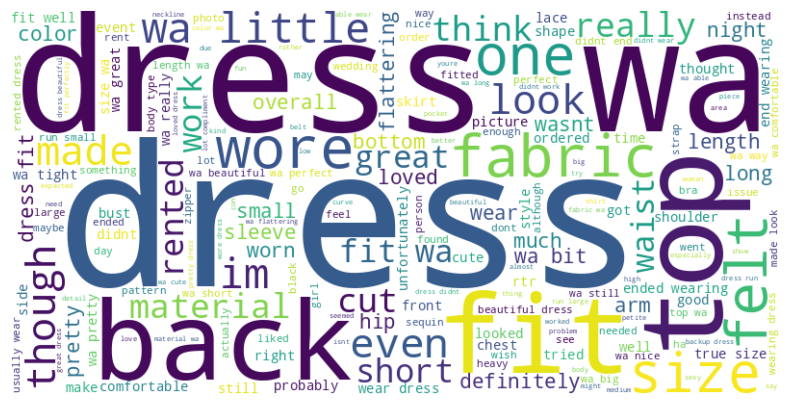

In [25]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#Here we are Filtering rows where recommendation is 0
df_recommendation_0 = df[df['recommendation'] == 0]

#Combining those cleaned and lemmatized tokens into a single string
text_recommendation_0 = " ".join(token for tokens_list in df_recommendation_0['cleaned_tokens_lemmatized'] for token in tokens_list)

#Generating the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_recommendation_0)

#Plotting the WordCloud image for visualization
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


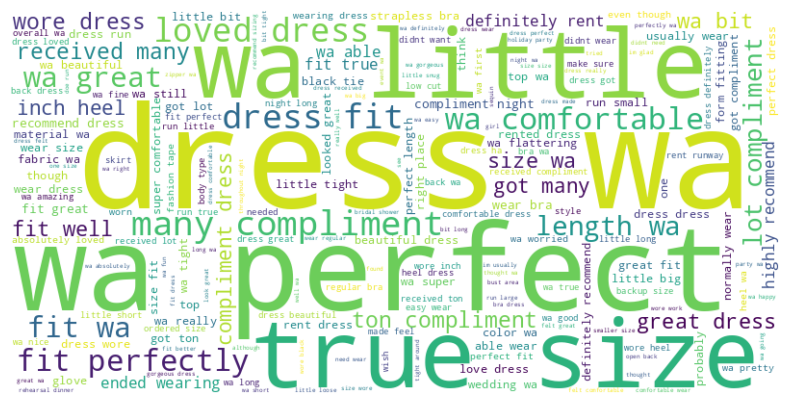

In [29]:
#Here we are filtering rows where recommendation is 1
df_recommendation_1 = df[df['recommendation'] == 1]

#Combining the cleaned and lemmatized tokens into a single string
text_recommendation_1 = " ".join(token for tokens_list in df_recommendation_1['cleaned_tokens_lemmatized'] for token in tokens_list)

#Generating the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_recommendation_1)

#Plotting the WordCloud image for visualization
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
